In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd 
data = pd.read_csv("/Users/siriusyin/jupyter-env/sentiment140.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

In [5]:
data.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
data.tail()

,label,time,date,query,username,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [7]:
data.columns


Index(['label', 'time', 'date', 'query', 'username', 'text'], dtype='object')

In [8]:
print('lenght of data is', len(data))

lenght of data is 1599999


In [9]:
data.shape

(1599999, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1599999 non-null  int64 
 1   time      1599999 non-null  int64 
 2   date      1599999 non-null  object
 3   query     1599999 non-null  object
 4   username  1599999 non-null  object
 5   text      1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
data.dtypes

label        int64
time         int64
date        object
query       object
username    object
text        object
dtype: object

In [12]:
import numpy as np
np.sum(data.isnull().any(axis=1))

0

In [13]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   6


In [14]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   1599999


In [15]:
data=data[['text','label']]

In [16]:
data['label'][data['label']==4]=1

In [17]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

In [18]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [19]:
data = pd.concat([data_pos, data_neg])

In [20]:
data['text']=data['text'].str.lower()

In [21]:
data['text'].tail()

19995                            one more day of holidays 
19996    feeling so down right now .. i hate you damn h...
19997    geez,i hv to read the whole book of personalit...
19998    i threw my sign at donnie and he bent over to ...
19999    @heather2711 good thing i didn't find any then...
Name: text, dtype: object

In [22]:
import nltk
nltk.download('stopwords')

stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siriusyin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [24]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

799999                love @health4uandpets u guys r best!!
800000    im meeting one besties tonight! cant wait!! - ...
800001    @darealsunisakim thanks twitter add, sunisa! g...
800002    sick really cheap hurts much eat real food plu...
800003                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [25]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [26]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

19995                                     one day holidays
19996                     feeling right  hate damn humprey
19997    geezi hv read whole book personality types emb...
19998     threw sign donnie bent get thingee made sad face
19999    heather2711 good thing find none ones like com...
Name: text, dtype: object

In [27]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [28]:
import re
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [29]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)
    

In [30]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [31]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [32]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather271 god thing find none ones like come ...
Name: text, dtype: object

In [33]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [34]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()


19995                                     one day holidays
19996                       feling right hate damn humprey
19997    gezi hv read whole bok personality types embar...
19998       threw sign donie bent get thinge made sad face
19999    heather god thing find none ones like come siz...
Name: text, dtype: object

In [35]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [36]:
data['text'].head()


799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [37]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [38]:
data['text'].head()

799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [39]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/siriusyin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
data['text'].head()


799999             [love, healthuandpets, u, guys, r, best]
800000    [im, meting, one, besties, tonight, cant, wait...
800001    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800002    [sick, realy, cheap, hurts, much, eat, real, f...
800003                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

In [41]:
X=data.text
y=data.label

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)  # Assuming X is your list of texts
sequences = tok.texts_to_sequences(X)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)

In [43]:
sequences_matrix.shape

(40000, 500)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)



In [45]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [46]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout , Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import RMSprop
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


In [47]:
history=model.fit(X_train,Y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')


Epoch 1/6
315/315 [==============================] - 62s 193ms/step - loss: 0.5771 - accuracy: 0.6897 - val_loss: 0.5237 - val_accuracy: 0.7407
Epoch 2/6
315/315 [==============================] - 59s 189ms/step - loss: 0.6654 - accuracy: 0.6948 - val_loss: 0.5339 - val_accuracy: 0.7275
Epoch 3/6
315/315 [==============================] - 59s 188ms/step - loss: 0.4942 - accuracy: 0.7613 - val_loss: 0.5195 - val_accuracy: 0.7475
Epoch 4/6
315/315 [==============================] - 60s 192ms/step - loss: 0.4814 - accuracy: 0.7705 - val_loss: 0.5182 - val_accuracy: 0.7436
Epoch 5/6
315/315 [==============================] - 61s 193ms/step - loss: 0.4979 - accuracy: 0.7586 - val_loss: 0.5350 - val_accuracy: 0.7418
Epoch 6/6
315/315 [==============================] - 61s 193ms/step - loss: 0.4618 - accuracy: 0.7783 - val_loss: 0.5408 - val_accuracy: 0.7411
Training finished !!


In [48]:
accr1 = model.evaluate(X_test,Y_test)


375/375 [==============================] - 9s 23ms/step - loss: 0.5314 - accuracy: 0.7423


In [49]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) 

Test set
  Accuracy: 0.74


In [50]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5) 

375/375 [==============================] - 9s 23ms/step


375/375 [==============================] - 9s 23ms/step


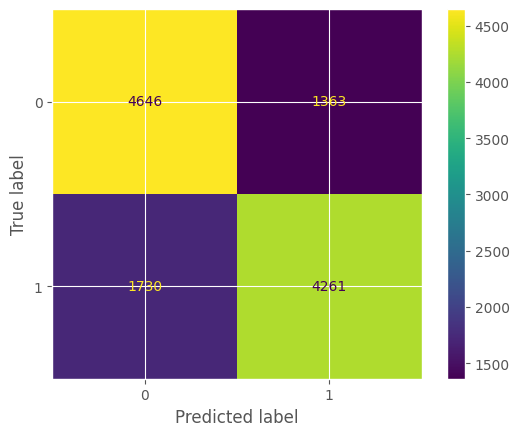

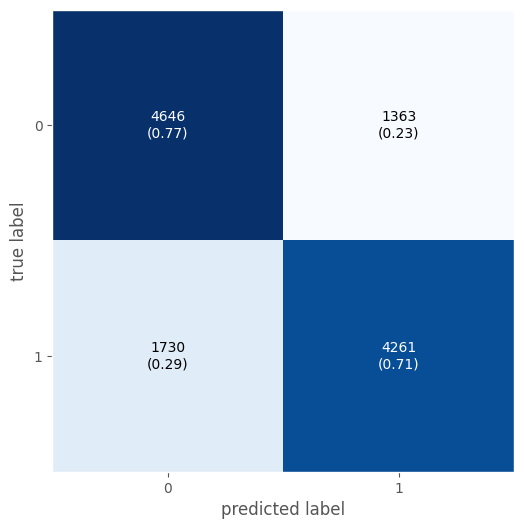

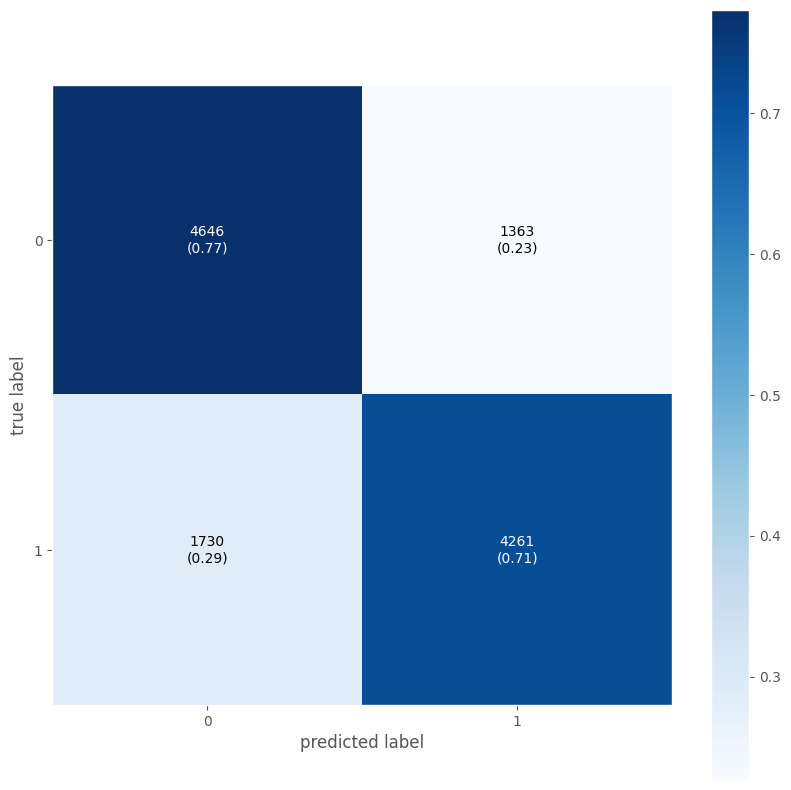


Confusion matrix:

[[4646 1363]
 [1730 4261]]




In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here
# Compute the confusion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix using sklearn's ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Display the confusion matrix using mlxtend's plot_confusion_matrix, normalized
plot_confusion_matrix(conf_mat=cm, figsize=(6,6), show_normed=True)
plt.show()

# Display the confusion matrix using mlxtend's plot_confusion_matrix, with absolute values and normalized
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), show_absolute=True, show_normed=True, colorbar=True)
plt.show()

# Print the confusion matrix
print('\nConfusion matrix:\n')
print(cm)
print('\n')



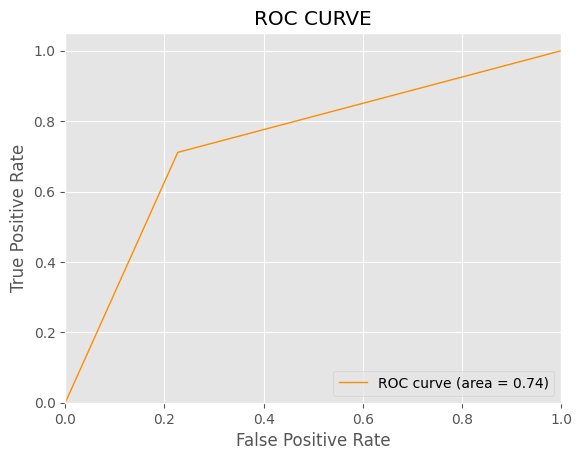

In [52]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/siriusyin/jupyter-env/sentiment140.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

# Filter tweets that contain the word "hate"
hate_tweets = data[data['text'].str.contains("hate", case=False, na=False)]

# Assuming '0' represents negative sentiment in the 'label' column
negative_hate_tweets_count = hate_tweets[hate_tweets['label'] == 0].shape[0]

print(f"Number of negative tweets containing 'hate': {negative_hate_tweets_count}")



import numpy as np
import matplotlib.pyplot as plt
# Filter tweets that contain the word "politic"
politic_tweets = data[data['text'].str.contains("politic", case=False, na=False)]

# Assuming '0' represents negative sentiment in the 'label' column
negative_politic_tweets_count = politic_tweets[politic_tweets['label'] == 0].shape[0]
non_negative_politic_tweets_count = politic_tweets.shape[0] - negative_politic_tweets_count

# Plotting the pie chart for the new filter
labels = 'Negative Sentiment', 'Non-negative Sentiment'
sizes = [negative_politic_tweets_count, non_negative_politic_tweets_count]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title("Proportion of Tweets with 'Politic' by Sentiment")
plt.show()



# Sample accuracy scores for training and test sets
accuracy_train = 0.85  # Replace with your actual training set accuracy
accuracy_test = accr1[1]  # Replace with your actual test set accuracy variable

# Set the positions and width for the bars
positions = np.arange(len(['Training Set', 'Test Set']))
width = 0.4  # the width of the bars

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(positions, [accuracy_train, accuracy_test], width, label='Accuracy', color=['blue', 'orange'])

# Add some text for labels, title, and axes ticks
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training and Test Data')
plt.xticks(positions, ['Training Set', 'Test Set'])
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

# Adding the text labels on the bars
plt.text(positions[0], accuracy_train + 0.01, f'{accuracy_train:.2f}', ha='center', va='bottom')
plt.text(positions[1], accuracy_test + 0.01, f'{accuracy_test:.2f}', ha='center', va='bottom')

# Show legend
plt.legend()

# Show the plot
plt.show()

In [53]:
#input_text=input('Enter your tweet:')

In [62]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Make sure this is the tokenizer used during training
# tokenizer = ...

input_text = input('Enter your tweet:')  # Capture user input correctly

# Ensure input_text is in a list for the tokenizer
sequences = tok.texts_to_sequences([input_text])  # Corrected to use the user's input
padded_sequences = pad_sequences(sequences, maxlen=max_len)  # Use the appropriate maxlen used during training

# Make a prediction
prediction = model.predict(padded_sequences)
print(prediction)

# Correctly access the prediction score for the first (and only) input
predicted_score = prediction[0][0]  # Access the first element in the prediction array

if predicted_score > 0.5:
    print("This is positive.")
else:
    print("This is negative.")


Enter your tweet: my tears drop because I am so happy that winning the prize


1/1 [==============================] - 0s 21ms/step
[[0.9187884]]
This is positive.


Enter keyword: politics


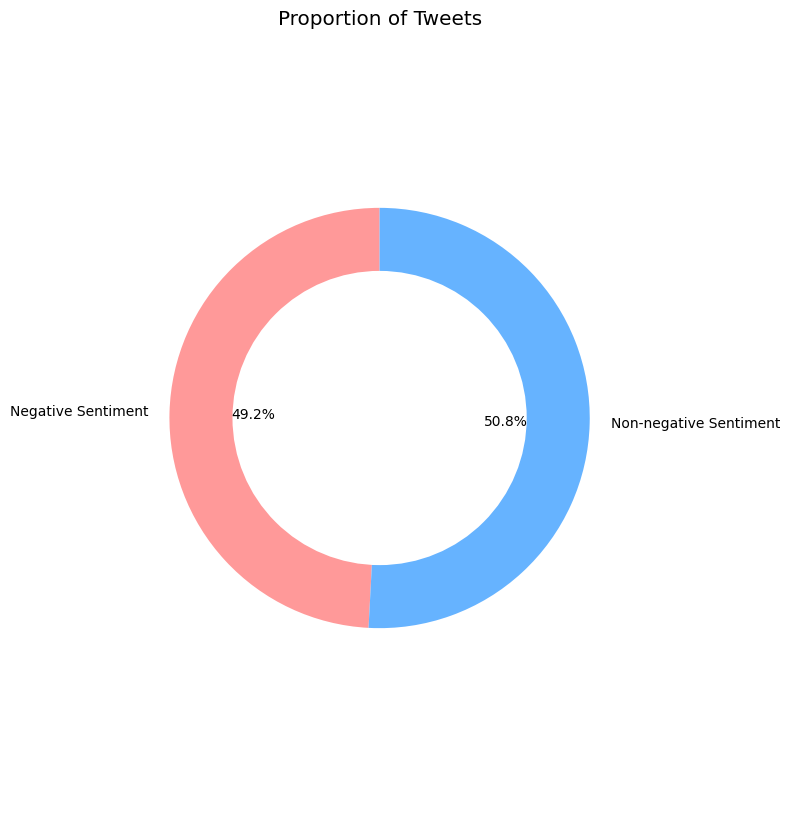

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/siriusyin/jupyter-env/sentiment140.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]


keyword=input("Enter keyword:");
# Filter tweets that contain the key word 
keyword_tweets = data[data['text'].str.contains(keyword, case=False, na=False)]

# Count the number of negative and non-negative tweets from the filtered results
negative_tweets_count = keyword_tweets[keyword_tweets['label'] == 0].shape[0]
non_negative_tweets_count = keyword_tweets.shape[0] - negative_tweets_count

# Labels for the sections of our pie chart
labels = 'Negative Sentiment', 'Non-negative Sentiment'

# The values for each section of the pie chart
sizes = [negative_tweets_count, non_negative_tweets_count]

# The colors for each section of the pie chart
colors = ['#ff9999','#66b3ff']

# Plotting the pie chart
plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.tight_layout()

plt.title("Proportion of Tweets")
plt.show()




Enter your keyword: politics


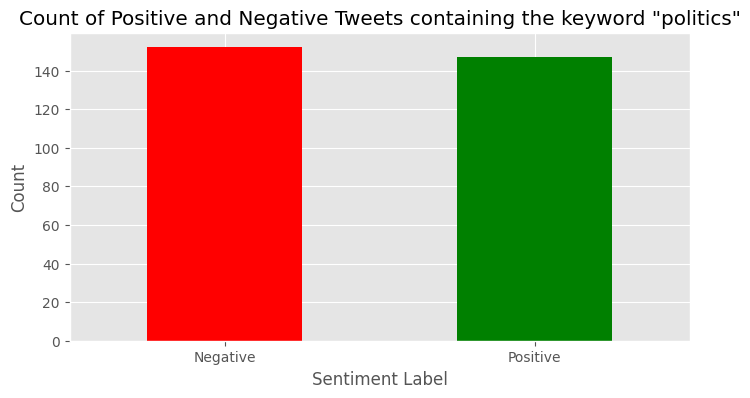

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/siriusyin/jupyter-env/sentiment140.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

def plot_keyword_sentiment():
    # Capture user input for the keyword
    keyword = input('Enter your keyword:')  # User inputs the keyword they're interested in

    # Filter data to include only rows where the 'text' column contains the keyword
    filtered_data = data[data['text'].str.contains(keyword, case=False, na=False)]
    
    # Count the number of positive and negative tweets
    sentiment_count = filtered_data['label'].value_counts()
    
    # Plotting
    plt.figure(figsize=(8, 4))
    sentiment_count.plot(kind='bar', color=['red', 'green'])
    plt.title(f'Count of Positive and Negative Tweets containing the keyword "{keyword}"')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)  # Adjust as per your data
    plt.show()

# Call the function to execute
plot_keyword_sentiment()


Enter your keyword: Netflix


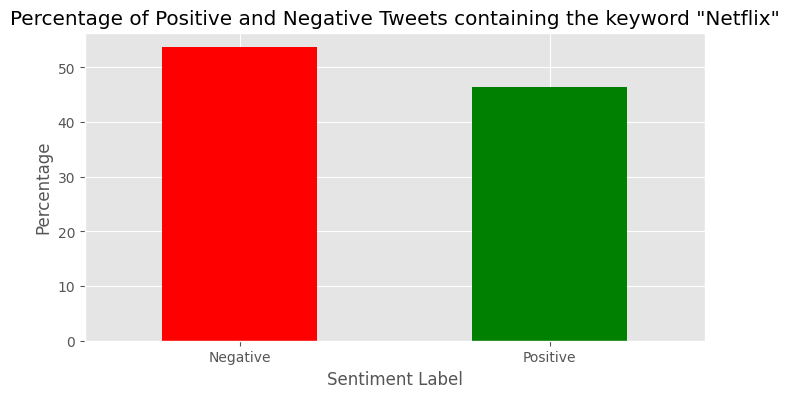

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/siriusyin/jupyter-env/sentiment140.csv", encoding="ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

def plot_keyword_sentiment_percentage():
    # Capture user input for the keyword
    keyword = input('Enter your keyword:')  # User inputs the keyword they're interested in
    
    # Filter data to include only rows where the 'text' column contains the keyword
    filtered_data = data[data['text'].str.contains(keyword, case=False, na=False)]
    
    # Count the number of positive and negative tweets
    sentiment_count = filtered_data['label'].value_counts(normalize=True) * 100  # Get percentage
    
    # Plotting
    plt.figure(figsize=(8, 4))
    sentiment_count.plot(kind='bar', stacked=True, color=['red', 'green'])
    plt.title(f'Percentage of Positive and Negative Tweets containing the keyword "{keyword}"')
    plt.xlabel('Sentiment Label')
    plt.ylabel('Percentage')
    plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'], rotation=0)  # Adjust as per your data
    plt.show()

# Call the function to execute
plot_keyword_sentiment_percentage()
